<a href="https://colab.research.google.com/github/paulmachau/Loan-Prediction/blob/main/Loan_Eligibility_Predictiond.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
#Importing Library
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# prompt: provide a code to read the train and test csv files

# Read the train CSV file
train_data = pd.read_csv('/content/train.csv')

# Read the test CSV file
test_data = pd.read_csv('/content/test.csv')


In [ ]:
# prompt: view the variables in the train dataset

train_data.head(10)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [ ]:
# prompt: Using dataframe train_data: view the information within the train Dataset

train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
# prompt: describing the train dataset
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Inference
* The code above provides an out put on the mean, standard deviation and the percentiles within the dataset

In [ ]:
# prompt: Get the unique values and their frequency of variable Property_Area

train_data['Property_Area'].value_counts()


Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Distribution of non numerical Variables and understanding their distribution in numerical values

In [ ]:
# prompt: checking for missing values

train_data.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# Create a copy of the dataset to preserve the original
cleaned_train_data = train_data.copy()

# Remove missing values from columns except 'Loan_ID'
cleaned_train_data.dropna(subset=cleaned_train_data.columns.difference(['Loan_ID']), inplace=True)

# Reset index after dropping rows
cleaned_train_data.reset_index(drop=True, inplace=True)

# Check the new shape of the dataset
print("Shape after removing missing values:", cleaned_train_data.shape)

cleaned_train_data.head(10)

Shape after removing missing values: (480, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
5,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
6,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
7,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
8,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
9,LP001024,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,Y


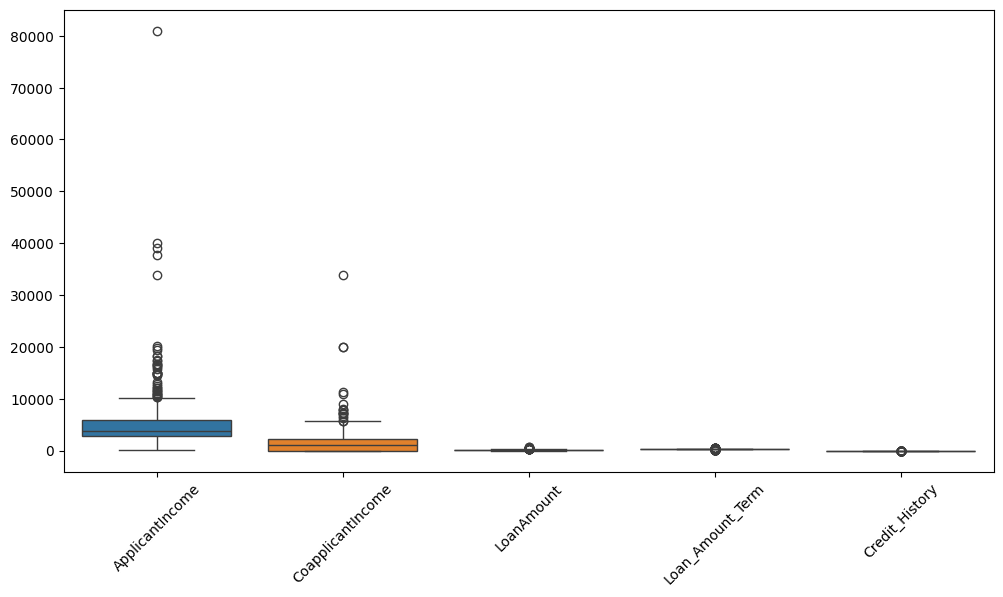

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [ ]:
# prompt: checking  for outliers and plotting a Box plot as a visual

# Check for outliers using a box plot
plt.figure(figsize=(12,6))
sn.boxplot(data=cleaned_train_data, orient="v")
plt.xticks(rotation=45)
plt.show()
cleaned_train_data.head()

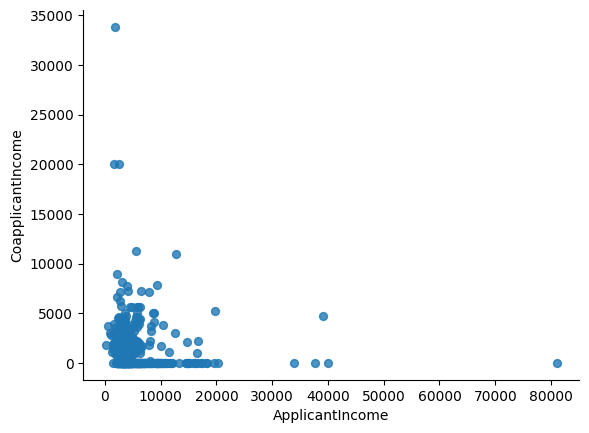

In [ ]:
# @title ApplicantIncome vs CoapplicantIncome

from matplotlib import pyplot as plt
cleaned_train_data.plot(kind='scatter', x='ApplicantIncome', y='CoapplicantIncome', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

#EDA

##Understanding Distribution of Categorical Variables

In [ ]:
cleaned_train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


<Axes: >

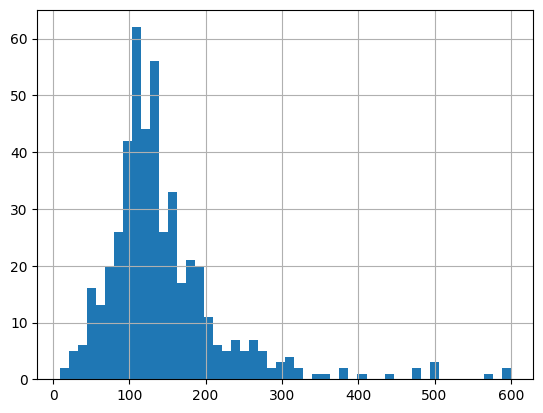

In [ ]:
# Histogram of variable LoanAmount

cleaned_train_data['LoanAmount'].hist(bins=50)

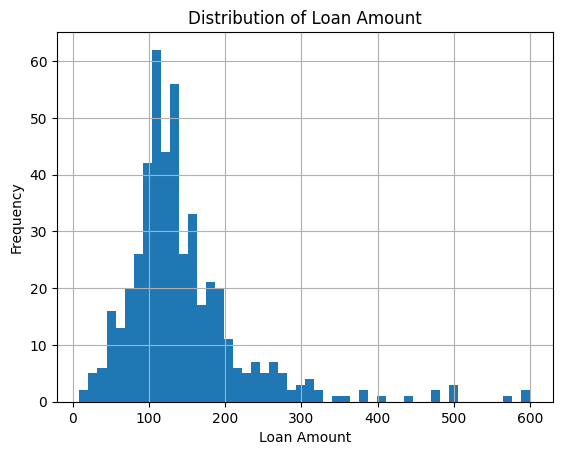

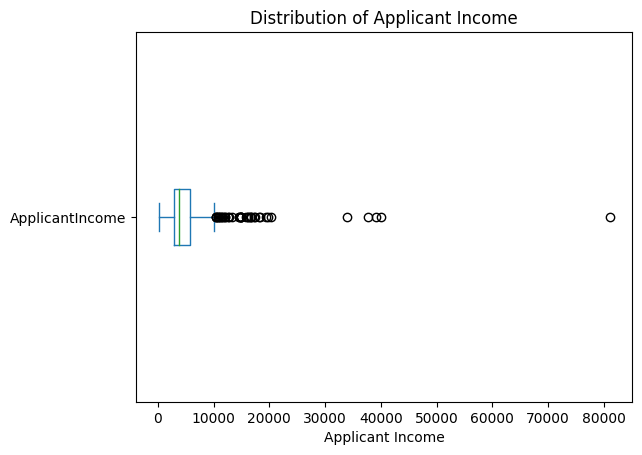

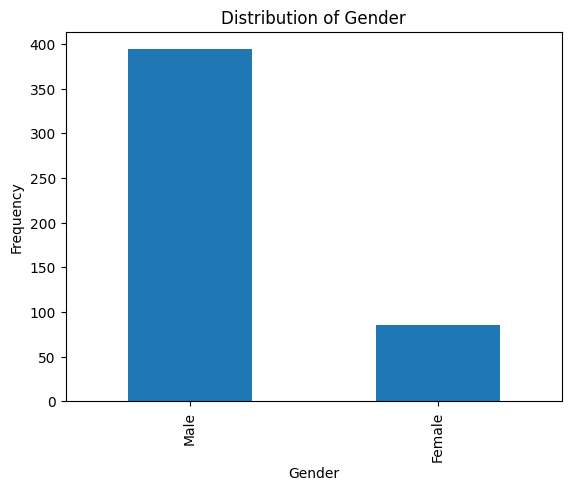

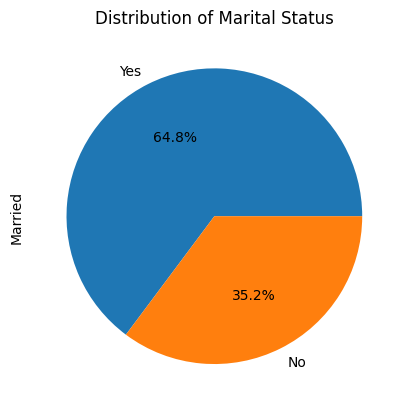

In [ ]:
# prompt: visualize distribution of variables

# Histogram of variable LoanAmount
cleaned_train_data['LoanAmount'].hist(bins=50)
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Amount')
plt.show()

# Box plot of variable ApplicantIncome
cleaned_train_data['ApplicantIncome'].plot(kind='box', vert=False)
plt.xlabel('Applicant Income')
plt.title('Distribution of Applicant Income')
plt.show()

# Bar chart of variable Gender
cleaned_train_data['Gender'].value_counts().plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Distribution of Gender')
plt.show()

# Pie chart of variable Married
cleaned_train_data['Married'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Marital Status')
plt.show()


**Inferences**

Certainly! Here are some inferences based on the output of the provided code:

1. Histogram of Loan Amount:
   - The histogram shows the distribution of loan amounts across the dataset.
   - It appears that the majority of loan amounts fall within a certain range, with a peak around a specific value.
   - There might be some variability in loan amounts, with a few loans being significantly larger or smaller than the majority.

2. Box plot of Applicant Income:
   - The box plot displays the distribution of applicant incomes.
   - The box plot shows the median, quartiles, and any outliers in the applicant income data.
   - There may be some outliers present in the applicant income distribution, as indicated by data points beyond the whiskers of the box plot.

3. Bar chart of Gender:
   - The bar chart illustrates the distribution of gender in the dataset.
   - It shows the frequency of each gender category (e.g., male and female).
   - It appears that there are more entries for one gender compared to the other, indicating an imbalance in the dataset with respect to gender.

4. Pie chart of Married:
   - The pie chart displays the distribution of marital status in the dataset.
   - It shows the proportion of married and unmarried individuals.
   - The majority of individuals in the dataset are either married or unmarried, with one category being more prevalent than the other.


<ipython-input-38-7cdbda0d79a4>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = cleaned_train_data.corr()


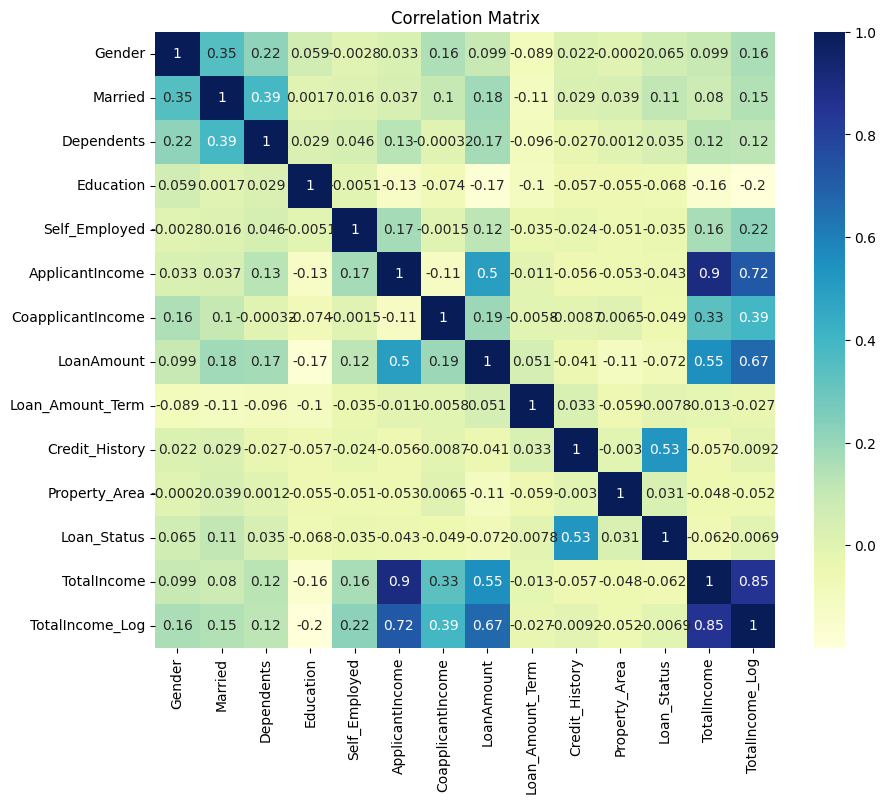

In [38]:
# prompt: showing the correlation of variable and using a heat map as a visual

# Calculate the correlation matrix
corr_matrix = cleaned_train_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sn.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.title("Correlation Matrix")
plt.show()

# **Inferences**
#
# The heatmap displays the correlation coefficients between different variables in the dataset.
#
# - Positive correlation: Variables with positive correlation coefficients tend to move in the same direction. For example, if one variable increases, the other variable also tends to increase.
# - Negative correlation: Variables with negative correlation coefficients tend to move in opposite directions. For example, if one variable increases, the other variable tends to decrease.
# - Strong correlation: The strength of the correlation is indicated by the intensity of the color in the heatmap. Darker colors represent stronger correlations, while lighter colors represent weaker correlations.
# - No correlation: Variables with correlation coefficients close to zero have little or no linear relationship.


In [ ]:
# Compute the correlation matrix
correlation_matrix = cleaned_train_data.corr()

# Print the correlation matrix
correlation_matrix.head()



<ipython-input-18-9b3935f39e33>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = cleaned_train_data.corr()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.112588,0.495310,-0.010838,-0.056152
CoapplicantIncome,-0.112588,1.000000,0.190740,-0.005775,-0.008692
LoanAmount,0.495310,0.190740,1.000000,0.050867,-0.040773
Loan_Amount_Term,-0.010838,-0.005775,0.050867,1.000000,0.032937
Credit_History,-0.056152,-0.008692,-0.040773,0.032937,1.000000


In [ ]:
# prompt: Loan approval rates in absolute numbers

# Count the number of approved and rejected loans
loan_approval_counts = cleaned_train_data['Loan_Status'].value_counts()

# Print the results
print("Loan Approval Rates in Absolute Numbers:")
print(loan_approval_counts)


Loan Approval Rates in Absolute Numbers:
Y    332
N    148
Name: Loan_Status, dtype: int64


In [ ]:
# prompt: credit history and loan status

# Create a cross-tabulation of Credit_History and Loan_Status
credit_history_vs_loan_status = pd.crosstab(cleaned_train_data['Credit_History'], cleaned_train_data['Loan_Status'])

# Display the cross-tabulation
print("Cross-Tabulation of Credit History and Loan Status:")
print(credit_history_vs_loan_status)

# Calculate the percentage of approved loans for each credit history category
credit_history_approval_rates = credit_history_vs_loan_status['Y'] / (credit_history_vs_loan_status['Y'] + credit_history_vs_loan_status['N'])

# Display the approval rates
print("\nLoan Approval Rates by Credit History:")
print(credit_history_approval_rates)


Cross-Tabulation of Credit History and Loan Status:
Loan_Status      N    Y
Credit_History         
0.0             63    7
1.0             85  325

Loan Approval Rates by Credit History:
Credit_History
0.0    0.100000
1.0    0.792683
dtype: float64


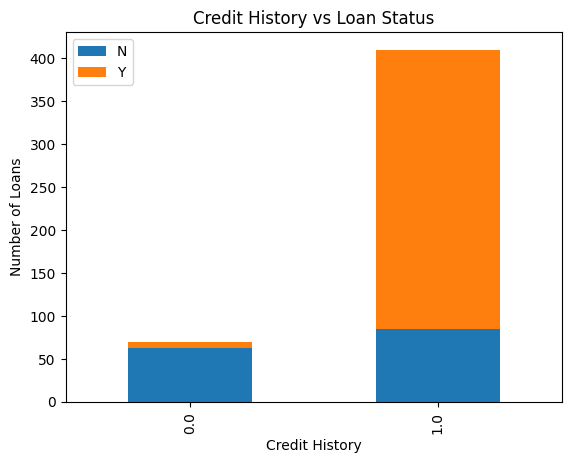

In [ ]:
# prompt: visual showing credit history Vs Loan status

# Create a stacked bar chart of Credit_History vs Loan_Status
credit_history_vs_loan_status.plot(kind='bar', stacked=True)

# Set the title and labels
plt.title('Credit History vs Loan Status')
plt.xlabel('Credit History')
plt.ylabel('Number of Loans')

# Display the legend
plt.legend()

# Display the plot
plt.show()


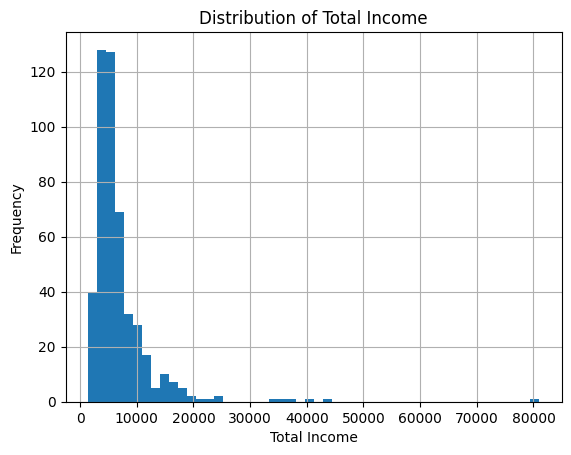

In [ ]:
# prompt: Add both ApplicantIncome and CoapplicantIncome to TotalIncome  and look at the distribution of the total income

# Calculate Total Income
cleaned_train_data['TotalIncome'] = cleaned_train_data['ApplicantIncome'] + cleaned_train_data['CoapplicantIncome']

# Histogram of Total Income
cleaned_train_data['TotalIncome'].hist(bins=50)
plt.xlabel('Total Income')
plt.ylabel('Frequency')
plt.title('Distribution of Total Income')
plt.show()


**Inferences**

* The extreme values are practically possible, i.e. some people might apply for high value loans due to specific needs. So instead of treating them as outliers, let’s try a log transformation to nullify their effect:

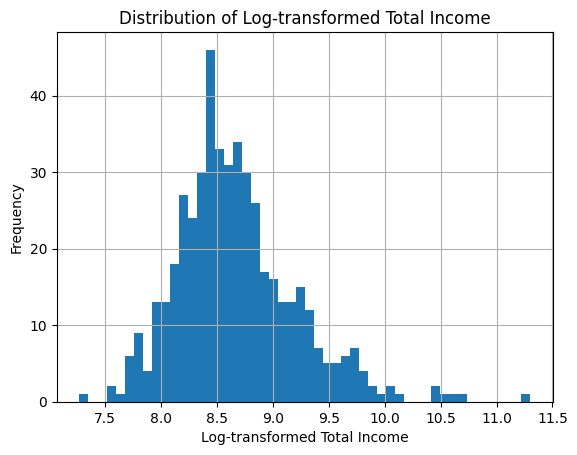

In [ ]:
# prompt: performing log transformation on the total income and visualizing the distribution

# Log transformation of Total Income
cleaned_train_data['TotalIncome_Log'] = np.log(cleaned_train_data['TotalIncome'])

# Histogram of Log-transformed Total Income
cleaned_train_data['TotalIncome_Log'].hist(bins=50)
plt.xlabel('Log-transformed Total Income')
plt.ylabel('Frequency')
plt.title('Distribution of Log-transformed Total Income')
plt.show()


* sklearn requires all inputs to be numeric, we should convert all our categorical variables into numeric by encoding the categories. Before that we will fill all the missing values in the dataset.

In [ ]:
# prompt: Adding total Income to our Data Set and displaying the data set

cleaned_train_data['TotalIncome'] = cleaned_train_data['ApplicantIncome'] + cleaned_train_data['CoapplicantIncome']

cleaned_train_data.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,TotalIncome_Log
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.714568
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.006368
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,8.505323
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699515
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,9613.0,9.170872


In [ ]:
# prompt: Filling in the missing values in the dataset and conducting Encoding

# Fill missing values with the mean of the column
cleaned_train_data.fillna(cleaned_train_data.mean(), inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
cleaned_train_data['Gender'] = label_encoder.fit_transform(cleaned_train_data['Gender'])
cleaned_train_data['Married'] = label_encoder.fit_transform(cleaned_train_data['Married'])
cleaned_train_data['Dependents'] = label_encoder.fit_transform(cleaned_train_data['Dependents'])
cleaned_train_data['Education'] = label_encoder.fit_transform(cleaned_train_data['Education'])
cleaned_train_data['Self_Employed'] = label_encoder.fit_transform(cleaned_train_data['Self_Employed'])
cleaned_train_data['Property_Area'] = label_encoder.fit_transform(cleaned_train_data['Property_Area'])
cleaned_train_data['Loan_Status'] = label_encoder.fit_transform(cleaned_train_data['Loan_Status'])

# Print the updated dataset
cleaned_train_data.head()


<ipython-input-25-de70e4276729>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  cleaned_train_data.fillna(cleaned_train_data.mean(), inplace=True)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,TotalIncome_Log
0,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,6091.0,8.714568
1,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,3000.0,8.006368
2,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,4941.0,8.505323
3,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,6000.0,8.699515
4,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1,9613.0,9.170872


**Inferences**
 * The encoding of categorical variables allows the inclusion of these features in predictive models.
* Filling missing values with the mean helps in maintaining data integrity and ensuring that there are no NaN values that might cause issues during modeling

#Modelling

##Logistic Regression Analysis

* it will show  the sign and magnitude of coefficients provide information about the direction and strength of the relationship between each variable and the target variable

In [ ]:
#Model Training
# Define X variables
X = cleaned_train_data[['Education', 'Gender', 'Married', 'TotalIncome',
                        'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
                        'Loan_Amount_Term', 'Credit_History', 'Property_Area']]

# Encode categorical variables (if needed)
X = pd.get_dummies(X, columns=['Education', 'Gender', 'Married', 'Property_Area'], drop_first=True)


In [ ]:
# prompt: Defining the y variable and Split data into train and test sets

# Define y variable
y = cleaned_train_data['Loan_Status']

# Split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
# prompt: Internalizing the logistic regression Model and Train the Model

# Instantiate a Logistic Regression model
logistic_model = LogisticRegression()

# Fit the model to the training data
logistic_model.fit(X_train, y_train)


LogisticRegression()

In [ ]:
# Fit the logistic regression model
logistic_model.fit(X_train, y_train)

# Access the coefficients of the model
coefficients = logistic_model.coef_[0]

# Access the intercept of the model
intercept = logistic_model.intercept_[0]

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

# Get the predicted probabilities for each class
y_pred_proba = logistic_model.predict_proba(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy
print("Accuracy:", accuracy)




Accuracy: 0.7708333333333334


* The accuracy of the logistic regression model on the test set is approximately 77.08%. This indicates that the model correctly predicts the loan status (approved or not) for about 77.08% of the test instances

In [ ]:
# Print coefficients
print("Coefficients:", coefficients)

Coefficients: [-1.54880284e-05  3.49427730e-05 -5.04308022e-05 -2.65215521e-03
 -5.59540049e-03  2.85414370e+00 -3.93529997e-01  2.78310317e-01
  5.91431840e-01  8.34335966e-01 -1.54342450e-01]


* Education: The coefficient is close to zero (-1.54880284e-05), suggesting that education level has minimal impact on the likelihood of loan approval.

* Gender: The coefficient is positive (3.49427730e-05), indicating that being male slightly increases the log odds of loan approval.

* Married: The coefficient is negative (-5.04308022e-05), suggesting that being married slightly decreases the log odds of loan approval.

* TotalIncome: The coefficient is negative (-2.65215521e-03), indicating that higher total income decreases the log odds of loan approval.

* ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area: Positive coefficients for these variables suggest that higher values of these features increase the log odds of loan approval.


In [ ]:
#The predicted probabilities for each class (0: Not approved, 1: Approved) for each observation in the test set
# Print intercept
print("Intercept:", intercept)

# Print predicted probabilities
print("Predicted probabilities:", y_pred_proba)

Intercept: 0.11702551069398001
Predicted probabilities: [[0.23588464 0.76411536]
 [0.25026179 0.74973821]
 [0.02754615 0.97245385]
 [0.28473425 0.71526575]
 [0.20541452 0.79458548]
 [0.06724449 0.93275551]
 [0.22980177 0.77019823]
 [0.1890616  0.8109384 ]
 [0.39059383 0.60940617]
 [0.26881996 0.73118004]
 [0.21233466 0.78766534]
 [0.23546241 0.76453759]
 [0.84487962 0.15512038]
 [0.20315774 0.79684226]
 [0.16658437 0.83341563]
 [0.2974895  0.7025105 ]
 [0.04639934 0.95360066]
 [0.21880718 0.78119282]
 [0.65281117 0.34718883]
 [0.07717443 0.92282557]
 [0.21832413 0.78167587]
 [0.18866223 0.81133777]
 [0.16449867 0.83550133]
 [0.16070586 0.83929414]
 [0.56083396 0.43916604]
 [0.60025268 0.39974732]
 [0.1923634  0.8076366 ]
 [0.05691839 0.94308161]
 [0.10612605 0.89387395]
 [0.18702541 0.81297459]
 [0.0672138  0.9327862 ]
 [0.05099347 0.94900653]
 [0.33743105 0.66256895]
 [0.24671783 0.75328217]
 [0.25203713 0.74796287]
 [0.09127683 0.90872317]
 [0.29783053 0.70216947]
 [0.20909649 0.7909

* For each observation, there are two predicted probabilities: one for class 0 (Not approved) and one for class 1 (Approved).

* The predicted probability for class 1 represents the model's confidence in predicting that the loan will be approved for that particular observation.

* High predicted probabilities of class 1 suggest a high likelihood of loan approval, while low predicted probabilities suggest a low likelihood of approval.

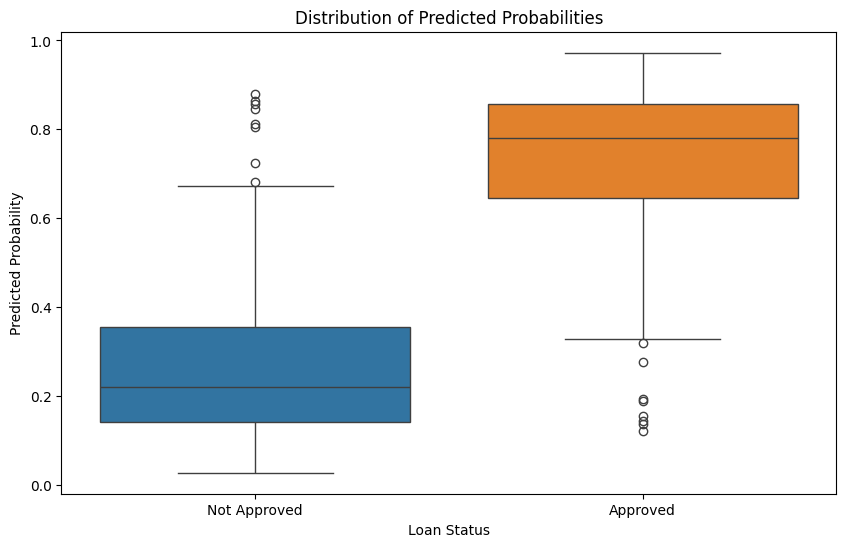

In [41]:
# prompt: Visual showing the predicted values (0 (Not approved) and one for class 1 (Approved).) box plot

# Create a box plot of predicted probabilities for each class
plt.figure(figsize=(8, 6))
sn.boxplot(data=pd.DataFrame(y_pred_proba), orient="v")
plt.xticks([0, 1], ['Not Approved', 'Approved'])
plt.ylabel('Predicted Probability')
plt.title('Distribution of Predicted Probabilities')
plt.show()


* The box plot for the "Not approved" class (class 0)  show a lower median and a narrower interquartile range compared to the "Approved" class (class 1). This suggests that the model is generally more confident in predicting instances that are not approved for a loan.

* Conversely, the box plot for the "Approved" class (class 1) exhibit a higher median and a wider interquartile range, indicating more variability in the predicted probabilities for instances that are approved for a loan.

Top Predictors for Loan Approval:
          Variable  Coefficient
5   Credit_History     2.854144
9  Property_Area_1     0.834336
8        Married_1     0.591432
6      Education_1    -0.393530
7         Gender_1     0.278310

Top Predictors for Loan Disapproval:
            Variable  Coefficient
4   Loan_Amount_Term    -0.005595
3         LoanAmount    -0.002652
2  CoapplicantIncome    -0.000050
1    ApplicantIncome     0.000035
0        TotalIncome    -0.000015


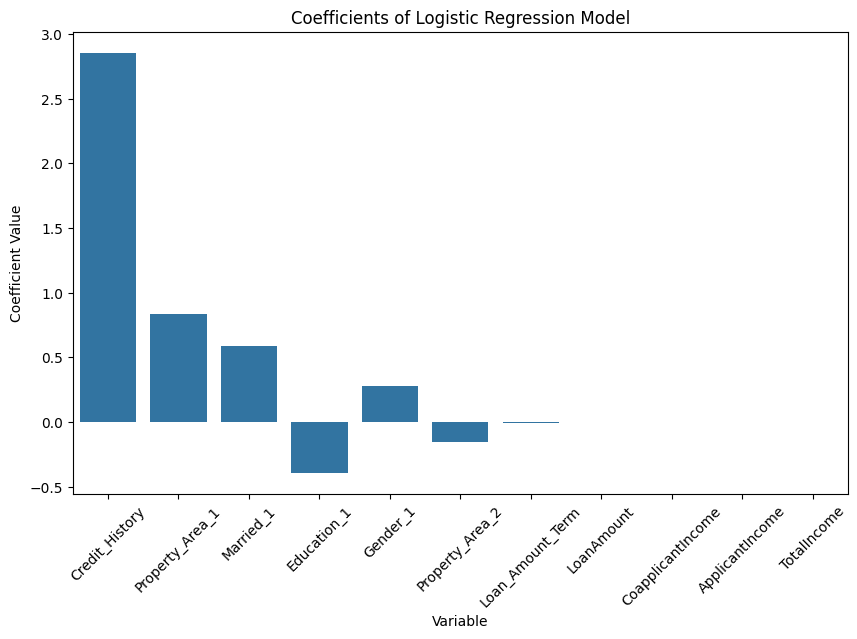

In [49]:
# prompt: To determine the best predictor variables for approving and disapproving a loan, and Ranking them and creating a visual

# Calculate the coefficients of the logistic regression model
coefficients = logistic_model.coef_[0]

# Create a DataFrame of coefficients
coefficients_df = pd.DataFrame({'Variable': X_train.columns, 'Coefficient': coefficients})

# Sort the DataFrame by absolute value of coefficients in descending order
coefficients_df = coefficients_df.sort_values(by='Coefficient', key=abs, ascending=False)

# Print the top predictors for loan approval
print("Top Predictors for Loan Approval:")
print(coefficients_df.head())

# Print the top predictors for loan disapproval
print("\nTop Predictors for Loan Disapproval:")
print(coefficients_df.tail())

# Create a bar plot of the coefficients
plt.figure(figsize=(10, 6))
sn.barplot(data=coefficients_df, x='Variable', y='Coefficient')
plt.xticks(rotation=45)
plt.ylabel('Coefficient Value')
plt.title('Coefficients of Logistic Regression Model')
plt.show()


##Top Predictors for Loan Approval:

* Credit_History: The variable "Credit_History" has the highest positive coefficient, indicating that having a good credit history significantly increases the likelihood of loan approval.

* Property_Area: The variable "Property_Area" with the highest coefficient indicates that certain property areas (encoded as "Property_Area_1") have a positive impact on loan approval. This suggests that properties in specific areas may have higher chances of loan approval.

* Married: Being married (encoded as "Married_1") has a positive coefficient, implying that married individuals are more likely to get loan approval compared to unmarried individuals.

* Education: Surprisingly, the variable "Education" with a coefficient for graduate education (encoded as "Education_1") has a negative coefficient.
This suggests that being a graduate might slightly reduce the chances of loan approval.

* Gender: The variable "Gender" with a positive coefficient for male (encoded as "Gender_1") indicates that being male might slightly increase the chances of loan approval.

#Random Forest Classifier Model

* Random Forest is an ensemble learning technique that builds multiple decision trees during training and combines their predictions to improve accuracy and reduce overfitting.It's known for handling both categorical and numerical data well, making it suitable for datasets with a mix of variable.
Random Forest can capture complex relationships between features and target variables, making it a powerful tool for classification tasks.
